In [44]:
import matplotlib.pyplot as plot
import seaborn as sb
import pandas as pd
import numpy as np

For our robo car simulation code we did some experimental measurements of the real car:

We measured the following values when invoking the 
RoboCar API function
```
turnLeft(100, timems)
```
angle in degree:

In [45]:
data = {'timems':  [50,100,150,200,250,300,350,400,500],
        'angle': [5,10,16,26,34,38,44,48,68]
        }
turnLeftData =  pd.DataFrame(data)

turnLeftData.head()

,timems,angle
0,50,5
1,100,10
2,150,16
3,200,26
4,250,34


/Users/peterbendel/opt/anaconda3/envs/new_ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


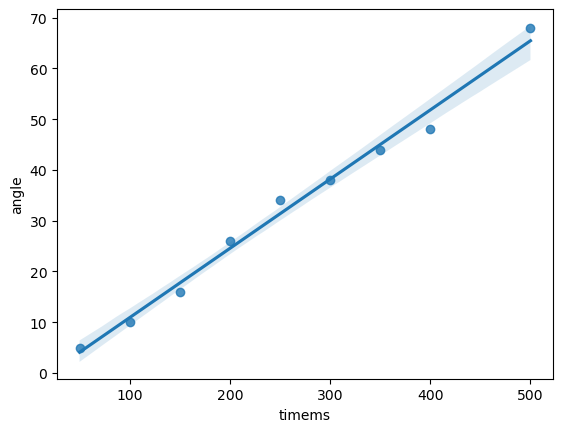

z = 0.13641935483870965 * x + -2.7516129032257965


In [46]:
p=sb.regplot(turnLeftData.timems,turnLeftData.angle)
plot.show()
x = p.get_lines()[0].get_xdata()
y = p.get_lines()[0].get_ydata()
a, b = np.polyfit(x, y, 1)
print ("z = {} * x + {}".format(a, b))

and for 
```
driveForward(100, timems)
```
we measured the following distances in mm

In [47]:
data = {'timems':  [50,100,150,200,250,300,350,400,500],
        'distmm': [8,13,37,42,65,80,95,107,135]
        }
driveForwardData =  pd.DataFrame(data)

driveForwardData.head()

,timems,distmm
0,50,8
1,100,13
2,150,37
3,200,42
4,250,65


/Users/peterbendel/opt/anaconda3/envs/new_ml/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


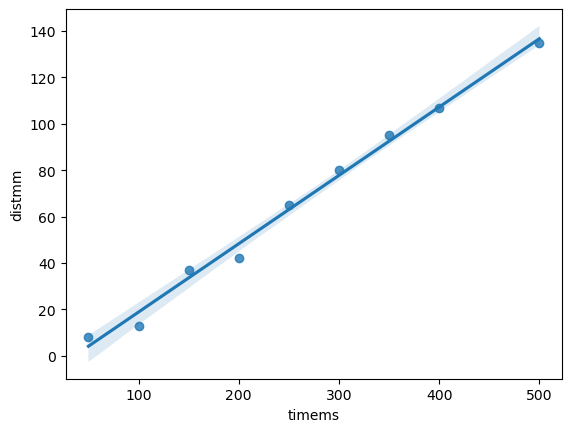

z = 0.2944838709677419 * x + -10.590322580645141


In [48]:
p=sb.regplot(driveForwardData.timems,driveForwardData.distmm)
plot.show()
x = p.get_lines()[0].get_xdata()
y = p.get_lines()[0].get_ydata()
a, b = np.polyfit(x, y, 1)
print ("z = {} * x + {}".format(a, b))

Now we can conclude that we have the following approximate formulas for a speed of 100 for the robo car
```
rotation_angle = 0.14 * timems - 2.75

distance_in_mm = 0.29 * timems - 10.59
````



Some sources used to create the code below


Rotation matrix:
https://www.101computing.net/2d-rotation-matrix/

Scaling, moving and rotating

https://stackoverflow.com/questions/23530449/rotate-scale-and-translate-2d-coordinates

Python libraries

- shapely https://shapely.readthedocs.io/en/maint-1.8/manual.html
- https://pythontic.com/image-processing/pillow/rotate

Drawing shapes and manipulate them
- https://note.nkmk.me/en/python-pillow-imagedraw/
using a coordinate system with 0,0 in upper left corner
- https://pillow.readthedocs.io/en/stable/reference/ImagePath.html
- https://pillow.readthedocs.io/en/stable/handbook/tutorial.html
- https://stackoverflow.com/questions/17056209/python-pil-affine-transformation
- Gifs:
- https://blog.zhaytam.com/2018/08/21/creating-gifs-using-python-pillow/
- https://stackoverflow.com/questions/2275446/python-animation-with-pil




In [ ]:
from Car import CarModel

car = CarModel()
car.setScale(1.0)
car.rotate(-45)

car.moveForward(200)


Draw a single frame with different positions of the car

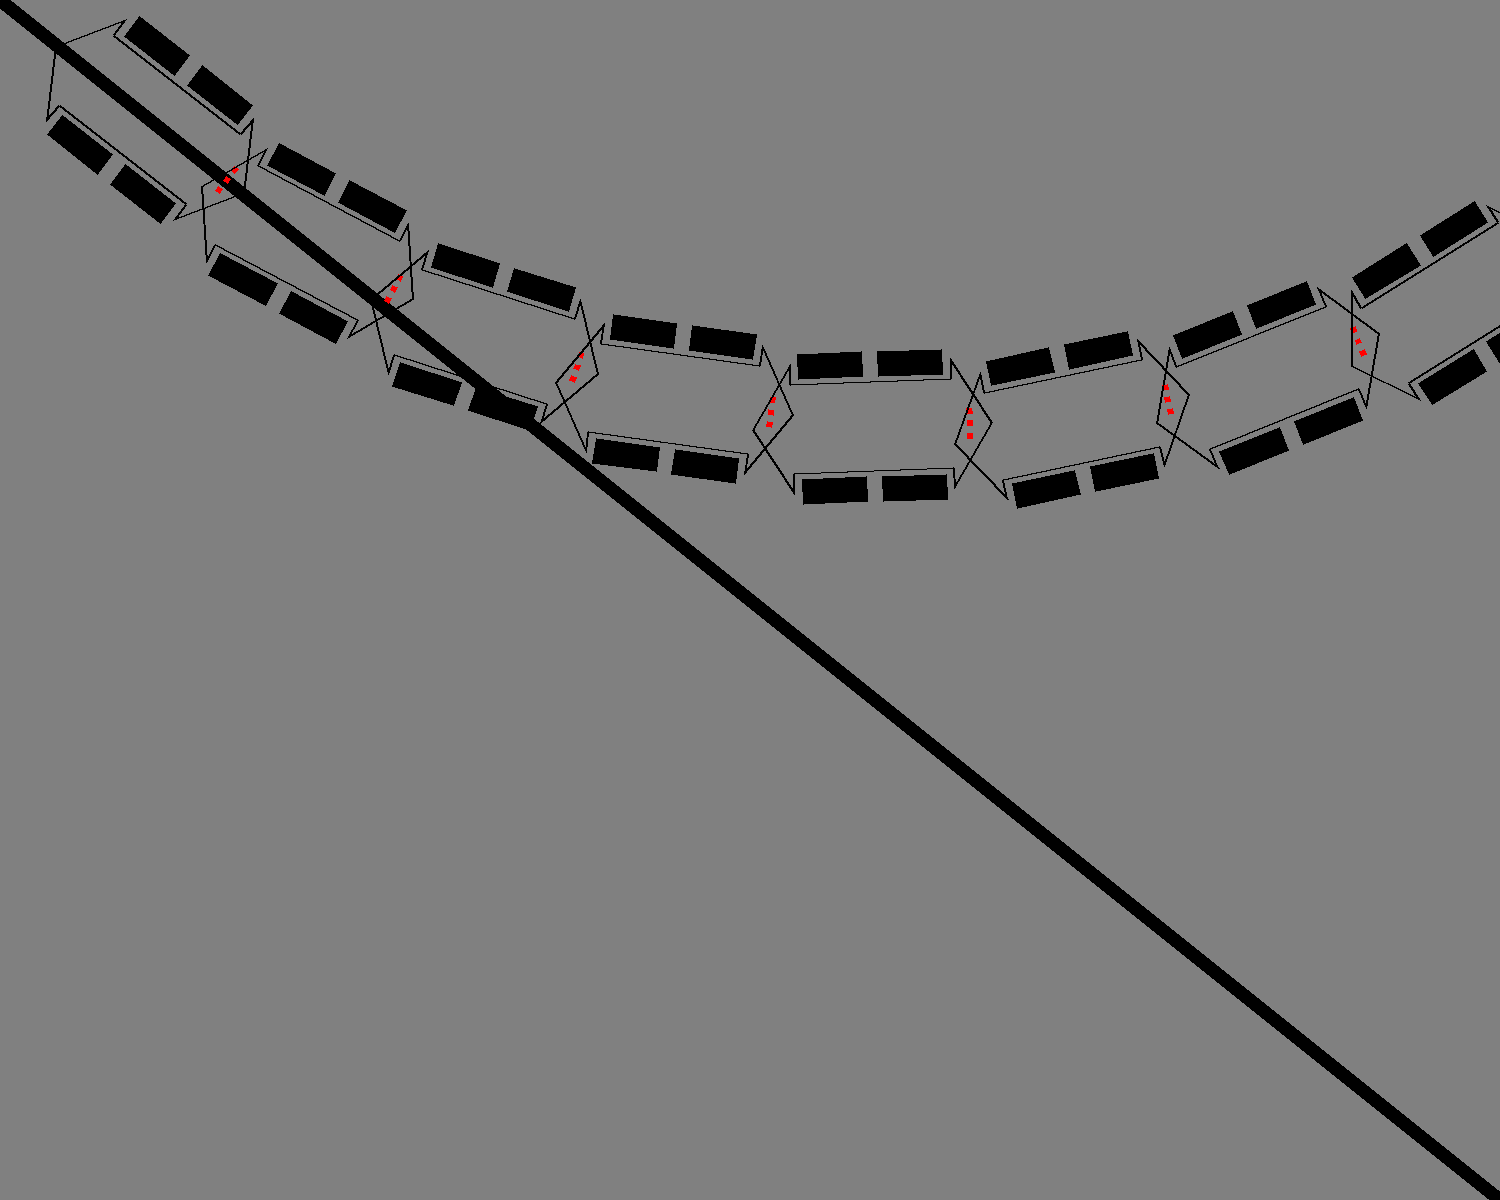

In [49]:
from PIL import Image, ImageDraw
import Car, time
car = Car.CarModel()
#car.setScale(0.5)

im = Image.new('RGBA', (1500, 1200), (128, 128, 128))
draw = ImageDraw.Draw(im)
draw.line((0,0,1500,1200),fill=(0,0,0), width=15 )

# move to start position
car.rotate(90.0)
car.moveForward(120.0)
car.rotate(-90.0)
car.moveForward(150.0)
car.rotate(38.0)
# draw start position
car.draw(draw)

# move and draw car

for i in range(0,10): 
    car.moveForward(200)
    car.rotate(-10)
    car.draw(draw)
   
   
display(im)


    

Generate a GIF "video" from the frames of the simulation, timed with the individual duration of each driving step

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import Car
car = Car.CarModel()
# move to start position
car.rotate(90.0)
car.moveForward(120.0)
car.rotate(-90.0)
car.moveForward(150.0)
car.rotate(38.0)

# draw frames
frames = []
durations = []
time = 0.0

genevafont = ImageFont.truetype("Geneva.ttf", 30)


for i in range (0,17):
    im = Image.new('RGB', (1700, 1400), (128, 128, 128))
    draw = ImageDraw.Draw(im)
    draw.rectangle((100,100,1600,1300),fill=(255,255,255),width=1, outline=(255,255,255) )
    draw.line((100,100,1600,1300),fill=(0,0,0), width=15 )
    text = 'Step: {:3d} Time: {:.2f} s - Sensors: L {:3d} M {:3d} R {:3d}'.format(i*2,time,455,828,444)
    draw.text((400,50), text, font=genevafont)

    # draw after moving forward and save image
    car.moveForward(100)
    time+= 0.2
    car.draw(draw)
    frames.append(im)
    durations.append(200)
    car.rotate(-5)
    time+=0.05
    durations.append(50)
    # draw after rotating
    im = Image.new('RGB', (1700, 1400), (128, 128, 128))
    draw = ImageDraw.Draw(im)
    draw.rectangle((100,100,1600,1300),fill=(255,255,255),width=1, outline=(255,255,255)) 
    draw.line((100,100,1600,1300),fill=(0,0,0), width=15 )
    text = 'Step: {:3d} Time: {:.2f} s - Sensors: L {:3d} M {:3d} R {:3d}'.format(i*2+1,time,455,828,444)
    draw.text((400,50), text, font=genevafont)
    car.draw(draw)
    frames.append(im)
    
    

frames[0].save('images/carsimulation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=durations, loop=0, optimize=True)


![SegmentLocal](carsimulation.gif "segment")

We can use shapely to intersect two polygons and compute the area of the intersection:

https://shapely.readthedocs.io/en/maint-1.8/manual.html#polygons

```
conda install shapely
```

```
from shapely.geometry import Polygon
p1 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]],...)
p2 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]],...)

# Polygon p1 (the line we track) and p2 (the sensor)
x = p1.intersection(p2)
areasize = x.area
```
then we can compute the sensor value in relation to the area size

Since shapely works with lists in polygon ctors we may need to convert our polygon tuples to lists as follows

```
spam = [('id','1'),('name','Mike'),('Adrs','Tor')]
eggs = [list(item) for item in spam]
```


In [2]:
from shapely.geometry import Polygon
p1tuple = ((0,0), (10,0), (10,20), (0,20), (0,0))
p2tuple = ((5,5), (15,0), (15,25), (5,25), (5,5))
p1 = Polygon([list(point) for point in p1tuple])
p2 = Polygon([list(point) for point in p2tuple])
x = p1.intersection(p2)
areasize = x.area
areasize

81.25

To draw our line we could use bezier curves for interpolation and follow the code here

https://stackoverflow.com/questions/246525/how-can-i-draw-a-bezier-curve-using-pythons-pil



In [2]:
def make_bezier(xys):
    # xys should be a sequence of 2-tuples (Bezier control points)
    n = len(xys)
    combinations = pascal_row(n-1)
    def bezier(ts):
        # This uses the generalized formula for bezier curves
        # http://en.wikipedia.org/wiki/B%C3%A9zier_curve#Generalization
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1-t)**i for i in range(n)])
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier

def pascal_row(n, memo={}):
    # This returns the nth row of Pascal's Triangle
    if n in memo:
        return memo[n]
    result = [1]
    x, numerator = 1, n
    for denominator in range(1, n//2+1):
        # print(numerator,denominator,x)
        x *= numerator
        x /= denominator
        result.append(x)
        numerator -= 1
    if n&1 == 0:
        # n is even
        result.extend(reversed(result[:-1]))
    else:
        result.extend(reversed(result))
    memo[n] = result
    return result


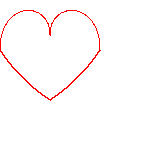

In [18]:
from PIL import Image
from PIL import ImageDraw


im = Image.new('RGBA', (150, 150), (0, 0, 0, 0)) 
draw = ImageDraw.Draw(im)
ts = [t/100.0 for t in range(101)]

xys = [(50, 100), (80, 80), (100, 50)]
bezier = make_bezier(xys)
points = bezier(ts)

xys = [(100, 50), (100, 0), (50, 0), (50, 35)]
bezier = make_bezier(xys)
points.extend(bezier(ts))

xys = [(50, 35), (50, 0), (0, 0), (0, 50)]
bezier = make_bezier(xys)
points.extend(bezier(ts))

xys = [(0, 50), (20, 80), (50, 100)]
bezier = make_bezier(xys)
points.extend(bezier(ts))

draw.polygon(points, outline = 'red')
display(im)
#points

However this generates only the points of a line (no width). But we need the polygon of a 15 mm wide line.
So how do we extend the given line to a polygon with the given width ?

Gladly shapely has the buffer operation exactly for that purpose: (see https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects)



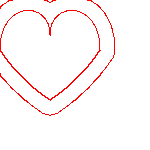

In [20]:
from shapely.geometry import Polygon
from itertools import chain
poly = Polygon([list(point) for point in points])
newpoints = poly.buffer(15,cap_style=3, join_style=1) # the buffer() invocation is the essential one extending the line
newtuple=list(newpoints.exterior.coords)

draw.polygon(newtuple, outline = 'red')
display(im)

first point: (100, 159)  second point: (623, 1053)
delta_y: 1.7093690248565965
angle: 59.67188839813127


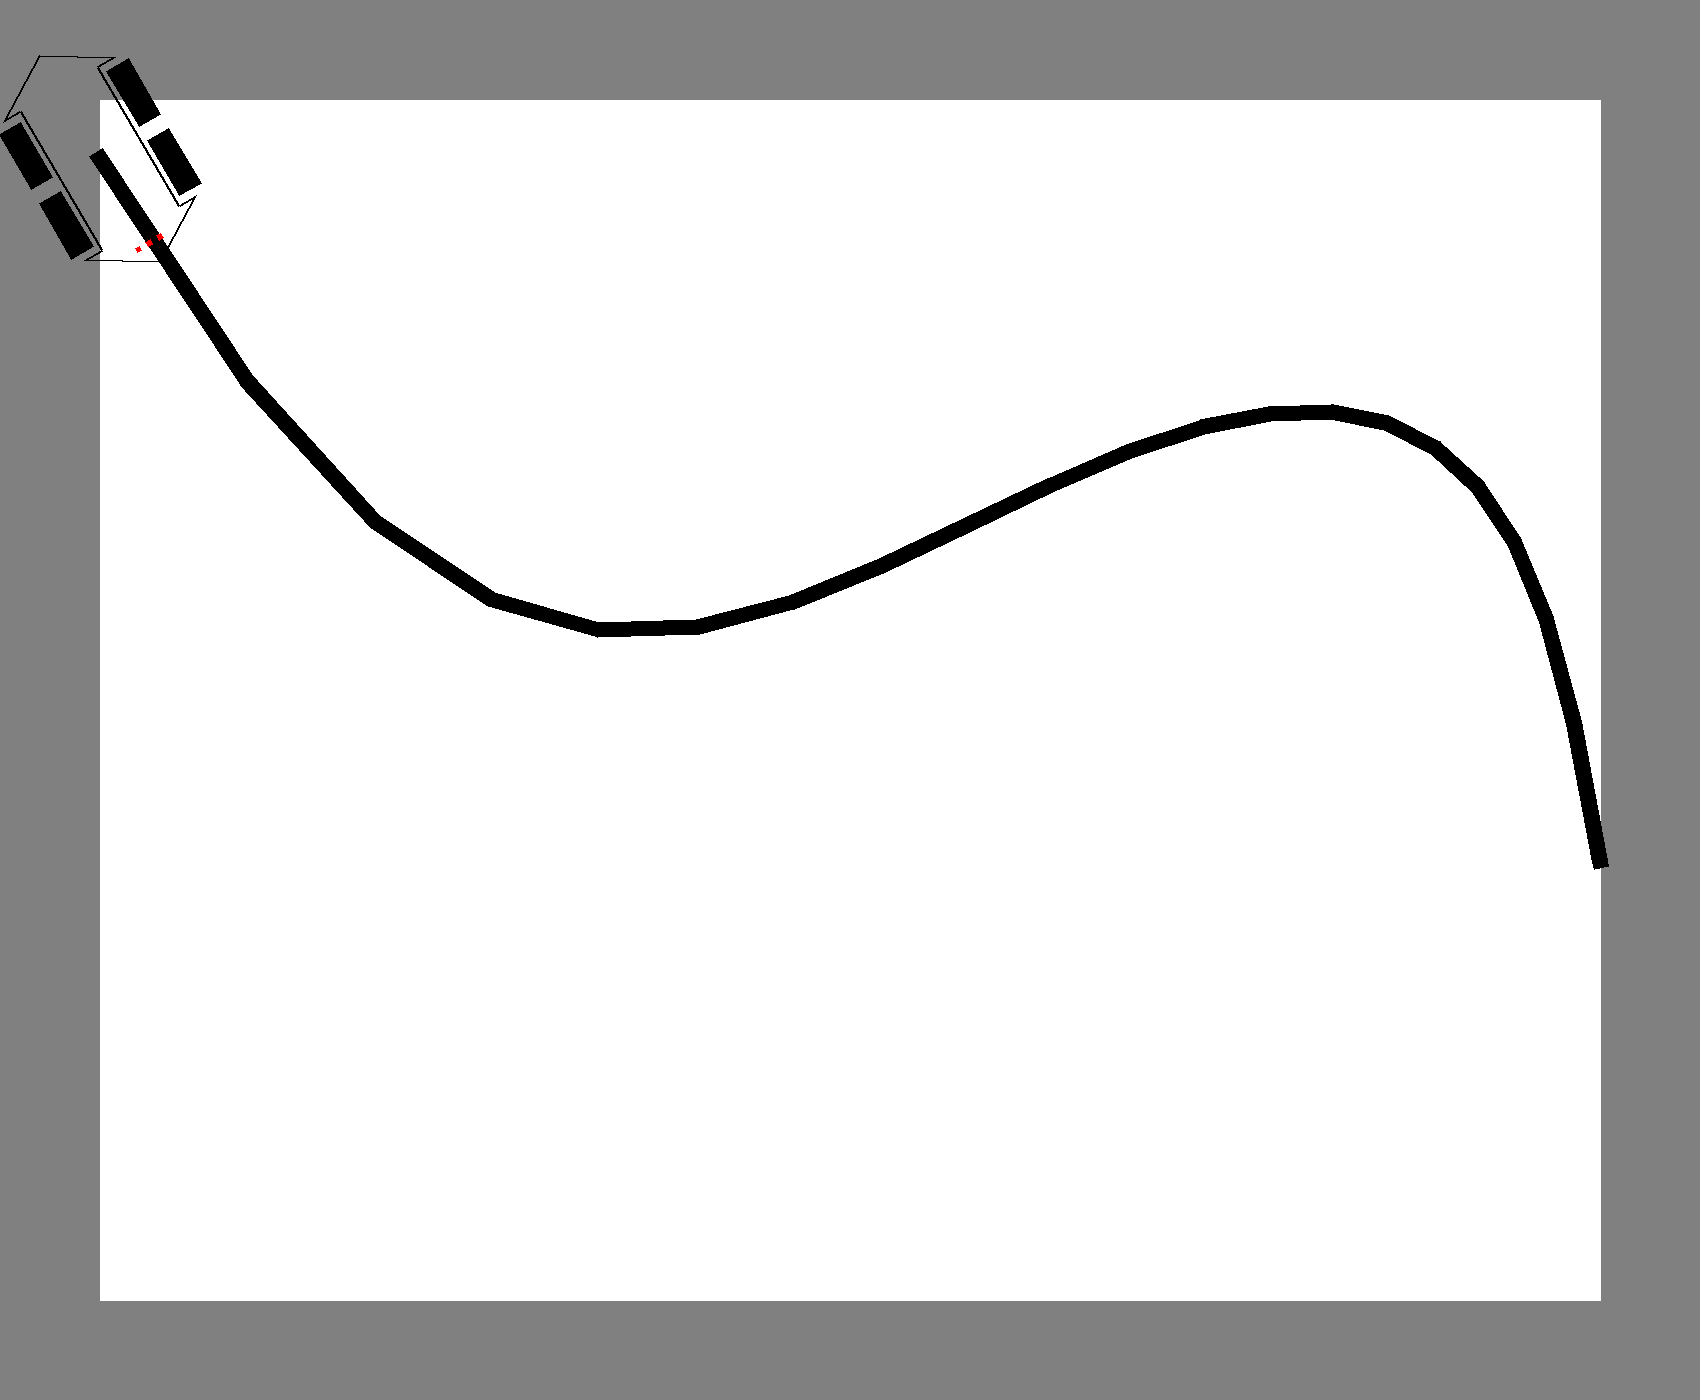

In [8]:
from PIL import Image
from PIL import ImageDraw
import random, math
from shapely.geometry import Polygon, LineString
from itertools import chain
import Car

CANVAS_SIZE=(1500,1200)
CANVAS_BORDER=100
CURVE_SEED=5
#CURVE_SEED=9
CURVE_WIDTH=15
IMAGE_SIZE=(CANVAS_SIZE[0]+CANVAS_BORDER*2, CANVAS_SIZE[1]+CANVAS_BORDER*2)

im = Image.new('RGB', (IMAGE_SIZE), (128, 128, 128))
draw = ImageDraw.Draw(im)
draw.rectangle((CANVAS_BORDER,CANVAS_BORDER,CANVAS_SIZE[0]+CANVAS_BORDER, CANVAS_SIZE[1]+CANVAS_BORDER),fill=(255,255,255),width=1, outline=(255,255,255) )

random.seed(CURVE_SEED)
i=random.randint(1,6) # number of points
x=[100]
x.extend(sorted(random.sample(range(CANVAS_BORDER, CANVAS_SIZE[0]+CANVAS_BORDER),i)))
x.append(CANVAS_SIZE[0]+CANVAS_BORDER)
y = random.sample(range(CANVAS_BORDER, CANVAS_SIZE[1]+CANVAS_BORDER),i+2)
xys = list(zip(x,y))
ts = [t/20.0 for t in range(21)]

bezier = make_bezier(xys)
points = bezier(ts)

# now extend line into 15 width polygon with shapely
line = LineString([list(point) for point in points])
newpoints = line.buffer(7.5,cap_style=3, join_style=1) # the buffer() invocation is the essential one extending the line
newtuple=list(newpoints.exterior.coords)

draw.polygon(newtuple, outline = 'black', fill='black')
#print(newtuple)

# alternative to just draw line with width 15 - however this does not give us the
# polygon to compute the intersection with the sensor position we need for the
# simulator:
#draw.line(points, fill='red', width=15)

# Now compute the car start position.
# a bezier curve is tangential to the first line given by the points, so we can compute 
# the angle from the line coordinates
print("first point:", xys[0], " second point:", xys[1])
delta_y = (xys[1][1]-xys[0][1])/(xys[1][0]-xys[0][0])
print("delta_y:", delta_y)
angle = math.degrees(math.atan(delta_y))
print("angle:", angle)

## draw car in start position
car = Car.CarModel()
car._position=xys[0]
car._rotation = angle
car.draw(draw)

display(im)


In [20]:
from shapely.geometry import Polygon
def computeSensorValues(curve, sensors):
    """ compute the size of the intersection between the sensor polygons and the curve polygon 
    and compute the sensor values
    
    curve: be a list of points that form a polygon e.g. [(0,0),(5,5),(0,0)]
    sensors: n-tuple of lists of points that form a polygon 
    e.g.
    ( ((95,-15),(100,-15),(100,-10),(95,-10),(95,-15)),# S0
            ((95,-2.5),(100,-2.5),(100,2.5),(95,2.5),(95,-2.5)), # S1
         ((95,10),(100,10),(100,15),(95,15),(95,10)), # S2
   
    )
    return sensor values between 30 (not on line) and 900 (fully on line)
    (in real life the sensor value depends on lighting conditions and varies between 0 and 1024)
    """
    result = []
    curve = Polygon([list(point) for point in curve])
    for i in range(3):
        currentsensorbounds = car.rotateAndTranslateAndScalePoints(sensors[i])
        sensorpoly = Polygon([list(point) for point in currentsensorbounds])
        x = curve.intersection(sensorpoly)
        areasize = x.area
        sensorvalue = 30 + 870 * areasize / 25.0
        result.append(sensorvalue)
    return result
    

In [19]:
result = computeSensorValues(newtuple, car.sensors)
result

[521.4408705685603, 847.4316956593154, 30.0]

Sensor values in start position: [521.4408705685603, 847.4316956593154, 30.0]
Sensor values after rotation position: [30.0, 899.9999999999993, 30.0]
Canvas bounds ((100, 100), (1600, 100), (1600, 1300), (100, 1300), (100, 100))


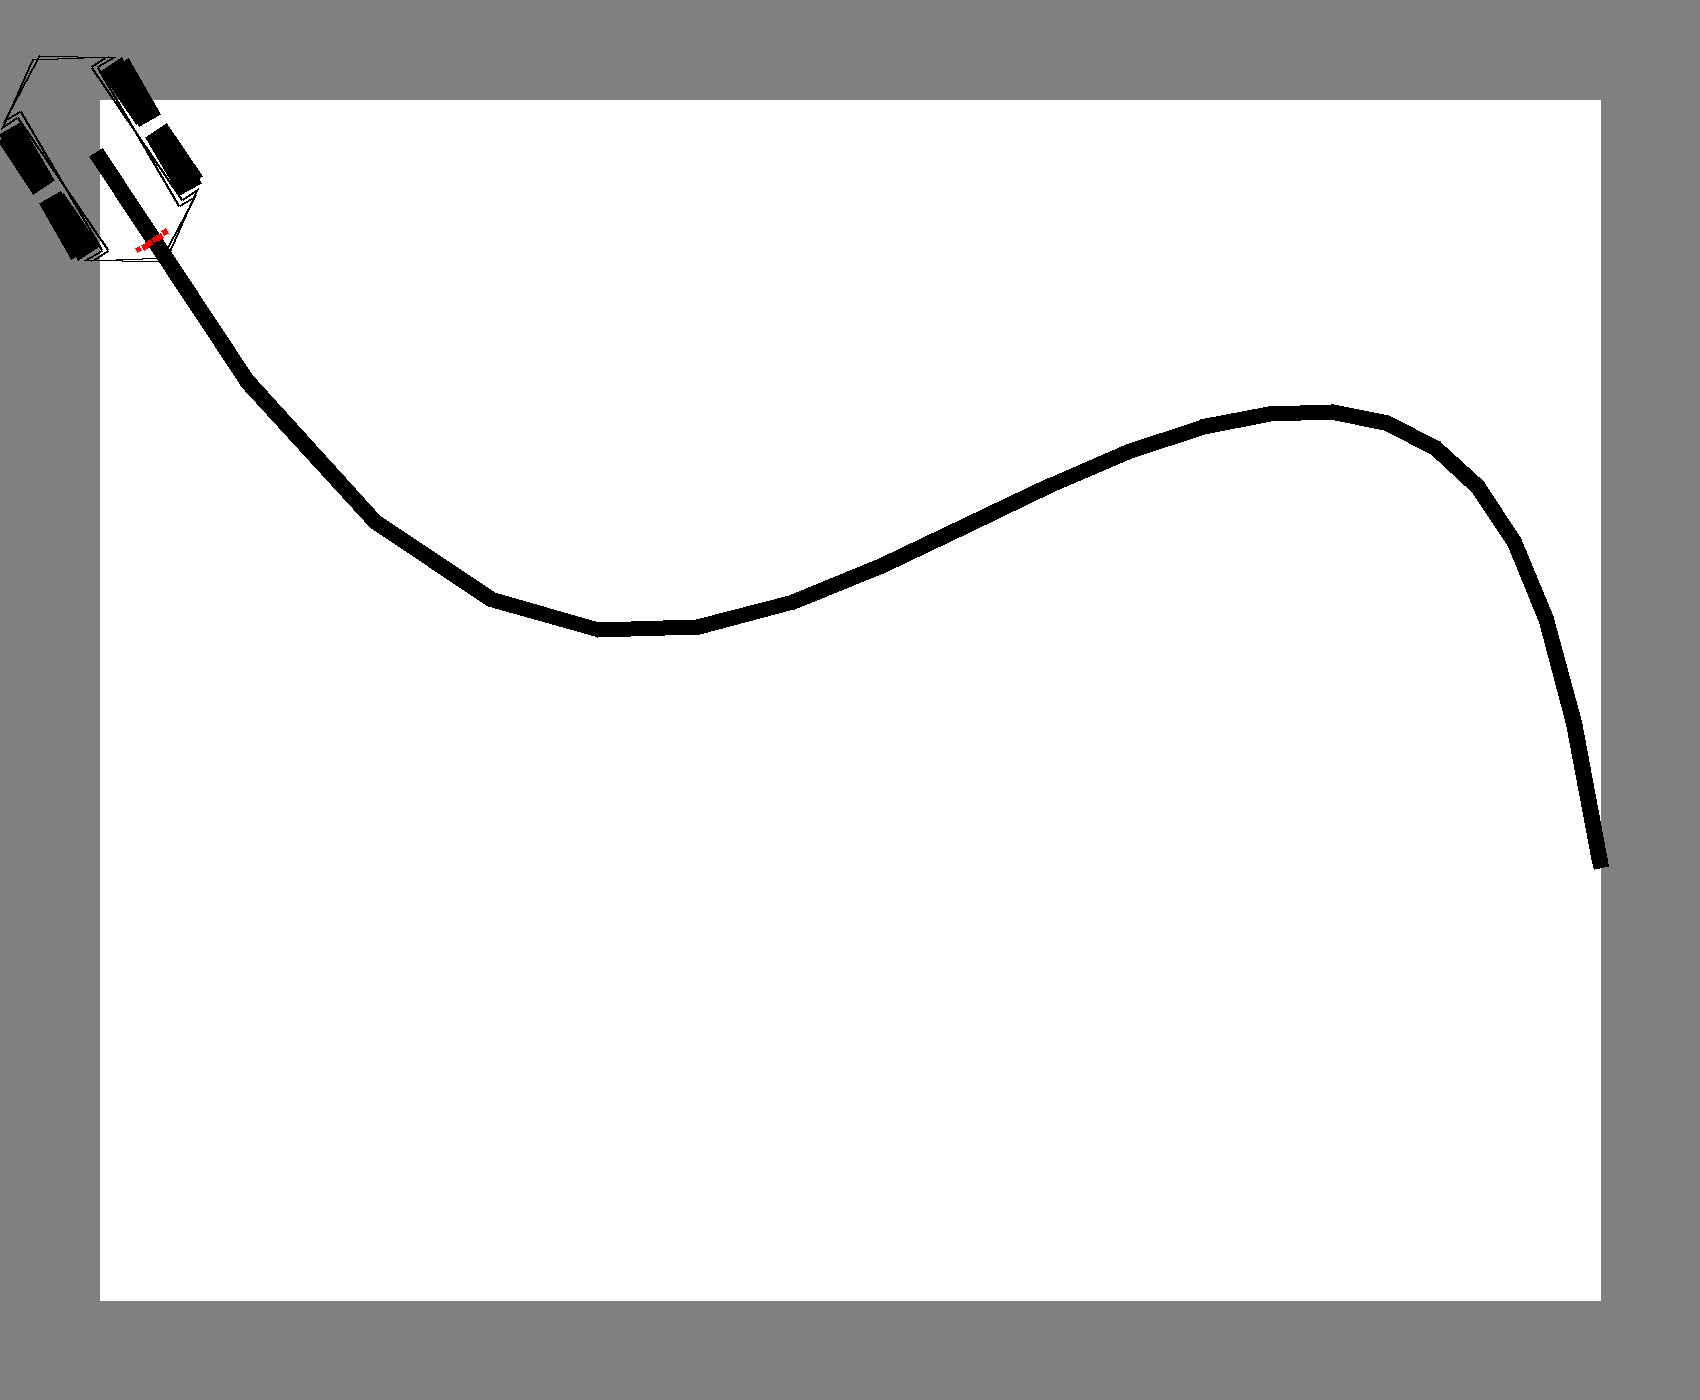

In [1]:
import Car
import Canvas

car = Car.CarModel()
canvas = Canvas.CanvasModel(seed=5)
car.setPosition(canvas.getCurveStartingPoint())
car.setOrientation(canvas.getCurveStartingOrientation())

(img, draw) = canvas.createImageAndDraw()
car.draw(draw)

print("Sensor values in start position:", car.computeSensorValues(canvas.getCurveBoundingPoints()))
car.rotate(-4)
car.draw(draw)
print("Sensor values after rotation position:", car.computeSensorValues(canvas.getCurveBoundingPoints()))
print("Canvas bounds", canvas.getCanvasBoundingPoints())

display(img)

